# Feedforward Neural Network with PyTorch on [Abalone](http://archive.ics.uci.edu/ml/datasets/Abalone) dataset
By [Zahra Taheri](https://github.com/zahta), October 20, 2020

### Import libraries

In [1]:
#For some basic operations
import numpy as np
import pandas as pd

import torch
import torch.nn as nn

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

# to make this notebook's output identical at every run
#np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
data=pd.read_csv('abalone.csv')
data.shape

(4177, 9)

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Descriptive statistics and data visualizations

In [5]:
#Describe the dataset

data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

Sex    3
dtype: int64

In [7]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64


In [8]:
data['age'] = data['Rings']+1.5
data.drop('Rings', axis = 1, inplace = True)
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


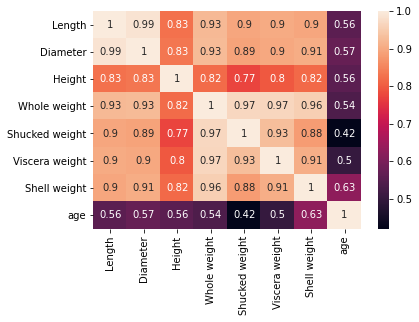

In [9]:
# Correlations

sns.heatmap(data.corr(), annot = True)

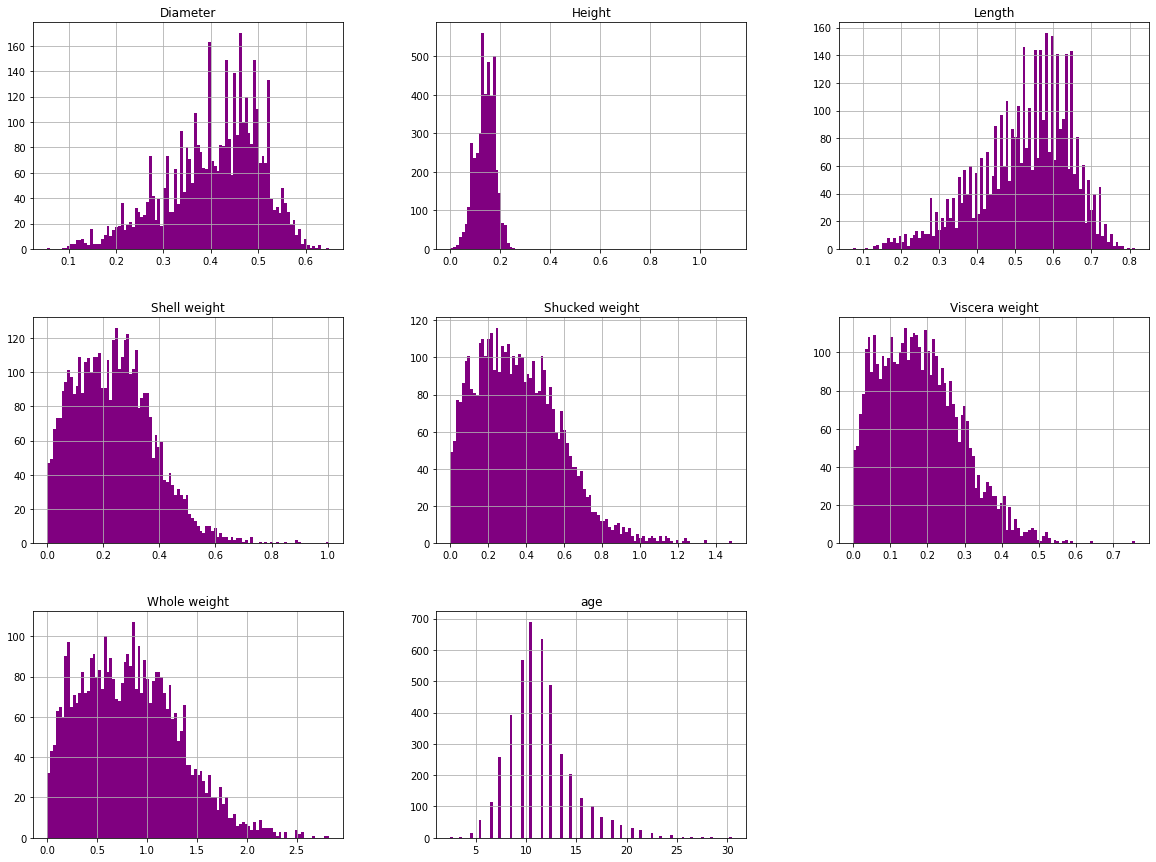

In [11]:
data.hist(bins=100, figsize=(20,15), color='purple')

plt.show()

In [13]:
#Preprocess the categorical input feature, `Sex`:
data_cat = data[["Sex"]]
data_cat.head(10)

,Sex
0,M
1,M
2,F
3,M
4,I
5,I
6,F
7,F
8,M
9,F


In [14]:
data["M"] = np.nan
data["F"] = np.nan
data["I"] = np.nan
columnName='Sex'
for i in range (len(data[columnName])):
    if data[columnName][i]=='M':
        data['M'][i]=1
        data['F'][i]=0
        data['I'][i]=0
    elif data[columnName][i]=='F':
        data['M'][i]=0
        data['F'][i]=1
        data['I'][i]=0
    elif data[columnName][i]=='I' :
        data['M'][i]=0
        data['F'][i]=0
        data['I'][i]=1
data=data.drop(['Sex'],axis=1)

In [15]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,age,M,F,I
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,1.0,0.0,0.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,1.0,0.0,0.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,0.0,1.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,1.0,0.0,0.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0.0,0.0,1.0


In [19]:
from sklearn import preprocessing

X=data.drop(['age'],axis=1)
y=data['age']
X = preprocessing.normalize(X)

print(X.shape)
print(y.shape)

(4177, 10)
(4177,)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape

(2923, 10)

In [16]:
train_data = X_train
test_data = X_test
train_labels = y_train.values.reshape(-1,1)
test_labels = y_test.values.reshape(-1,1)

## Preparation of the dataset for PyTorch

In [17]:
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.tensor(train_data, dtype=torch.float).cuda() # transform to torch tensor
tensor_x2 = torch.tensor(test_data, dtype=torch.float).cuda() 

In [18]:
tensor_y = torch.tensor(train_labels, dtype=torch.float).cuda()
tensor_y2 = torch.tensor(test_labels, dtype=torch.float).cuda()

In [19]:
train_dataset = TensorDataset(tensor_x, tensor_y) # create your dataset
test_dataset = TensorDataset(tensor_x2,tensor_y2)

## Building Feedforward Neural Networks with PyTorch

In [20]:
# import libraries
from torch.autograd import Variable
from torchsummary import summary

### Model A: 3 Hidden Layers Feedforward Neural Network

### Create model class

In [21]:
batch_size = 50
n_iters = 10000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

171


In [22]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [23]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(hidden_dim3, output_dim)
        #self.relu4 = nn.ReLU()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        #out = self.relu4(out)
        return out

In [24]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 100
hidden_dim2 = 2000
hidden_dim3 = 100

In [25]:
model = FNN(input_dim, hidden_dim1, hidden_dim2, hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [26]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 100]           1,100
              ReLU-2               [-1, 1, 100]               0
            Linear-3              [-1, 1, 2000]         202,000
              ReLU-4              [-1, 1, 2000]               0
            Linear-5               [-1, 1, 100]         200,100
              ReLU-6               [-1, 1, 100]               0
            Linear-7                 [-1, 1, 1]             101
Total params: 403,301
Trainable params: 403,301
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 1.54
Estimated Total Size (MB): 1.57
----------------------------------------------------------------


In [27]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.0001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [28]:
# Train the model

train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
                
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 270.8352966308594. Test Loss: 47.90481948852539
Iteration: 1000. Training Loss: 451.1483154296875. Test Loss: 21.91905403137207
Iteration: 1500. Training Loss: 515.8593139648438. Test Loss: 14.751031875610352
Iteration: 2000. Training Loss: 355.26275634765625. Test Loss: 10.201254844665527
Iteration: 2500. Training Loss: 231.29698181152344. Test Loss: 8.814844131469727
Iteration: 3000. Training Loss: 211.41513061523438. Test Loss: 9.547264099121094
Iteration: 3500. Training Loss: 150.99148559570312. Test Loss: 11.855362892150879
Iteration: 4000. Training Loss: 274.83056640625. Test Loss: 9.104004859924316
Iteration: 4500. Training Loss: 164.5745849609375. Test Loss: 10.620211601257324
Iteration: 5000. Training Loss: 164.330810546875. Test Loss: 9.819368362426758
Iteration: 5500. Training Loss: 233.46530151367188. Test Loss: 7.902198791503906
Iteration: 6000. Training Loss: 292.8205261230469. Test Loss: 10.371176719665527
Iteration: 6500. Training Loss: 19

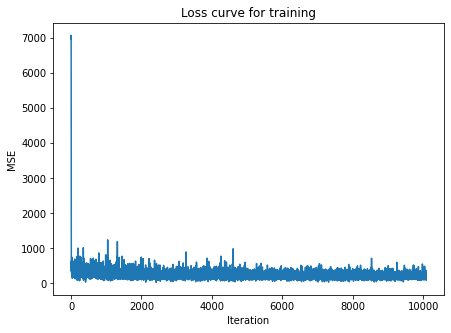

In [29]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()


In [30]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'abalone_pytorch_A.pkl')# only save parameters

### Model B: 1 Hidden Layers Feedforward Neural Network

### Create model class

In [31]:
batch_size = 50
n_iters = 10000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

171


In [32]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [33]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear4 = nn.Linear(hidden_dim1, output_dim)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear4(out)
        return out

In [34]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 256

In [35]:
model = FNN(input_dim, hidden_dim1, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [36]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 256]           2,816
              ReLU-2               [-1, 1, 256]               0
            Linear-3                 [-1, 1, 1]             257
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.01
Estimated Total Size (MB): 0.02
----------------------------------------------------------------


In [37]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [38]:

# Train the model

train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
                
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 295.73126220703125. Test Loss: 33.67766189575195
Iteration: 1000. Training Loss: 218.6232147216797. Test Loss: 20.276321411132812
Iteration: 1500. Training Loss: 183.1509552001953. Test Loss: 11.274395942687988
Iteration: 2000. Training Loss: 88.44757080078125. Test Loss: 12.895451545715332
Iteration: 2500. Training Loss: 145.03269958496094. Test Loss: 10.387856483459473
Iteration: 3000. Training Loss: 146.19325256347656. Test Loss: 14.474169731140137
Iteration: 3500. Training Loss: 356.40966796875. Test Loss: 9.974367141723633
Iteration: 4000. Training Loss: 239.40951538085938. Test Loss: 11.265732765197754
Iteration: 4500. Training Loss: 348.12481689453125. Test Loss: 10.952505111694336
Iteration: 5000. Training Loss: 340.0030517578125. Test Loss: 11.398340225219727
Iteration: 5500. Training Loss: 278.2239990234375. Test Loss: 9.834945678710938
Iteration: 6000. Training Loss: 246.09957885742188. Test Loss: 12.37874984741211
Iteration: 6500. Training Los

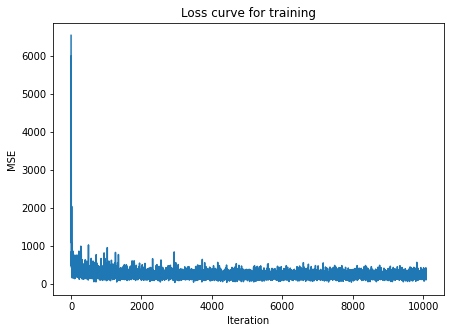

In [39]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()


In [40]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'abalone_pytorch_B.pkl')# only save parameters